# Sports Retailer DA Project

## Import packages and dataset

In [1]:
# Import packages

# For outputs of multiple lines to be shown
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Standard EDA packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Load dataset into a dataframe
transactions = pd.read_csv(r"C:\Users\diony\OneDrive\Documents\Sports_Retailer_Transactions.csv")

## Data exploration and cleaning

### Data exploration

In [3]:
# Looking at first few rows of dataframe
transactions.head()

,Unnamed: 0,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,1,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,2,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,3,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,4,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,5,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0


In [4]:
# Checking column datatypes
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496751 entries, 0 to 5496750
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   the_transaction_id      object 
 2   the_date_transaction    object 
 3   sku_idr_sku             int64  
 4   product_type            object 
 5   sports                  object 
 6   but_name_business_unit  object 
 7   ctm_customer_id         object 
 8   the_to_type             object 
 9   f_qty_item              int64  
 10  f_to_tax_in             float64
dtypes: float64(1), int64(3), object(7)
memory usage: 461.3+ MB


In [5]:
# Converting transaction date column to datetime
transactions['the_date_transaction'] = pd.to_datetime(transactions['the_date_transaction'])

In [6]:
# Recheck
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496751 entries, 0 to 5496750
Data columns (total 11 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Unnamed: 0              int64         
 1   the_transaction_id      object        
 2   the_date_transaction    datetime64[ns]
 3   sku_idr_sku             int64         
 4   product_type            object        
 5   sports                  object        
 6   but_name_business_unit  object        
 7   ctm_customer_id         object        
 8   the_to_type             object        
 9   f_qty_item              int64         
 10  f_to_tax_in             float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 461.3+ MB


In [7]:
# Dropping the unamed index column
transactions.drop(transactions.columns[0], axis=1, inplace=True)
transactions.head()

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0


In [8]:
# Checking descriptive stats. Not very useful here.
transactions.describe()

,sku_idr_sku,f_qty_item,f_to_tax_in
count,5.496751e+06,5.496751e+06,5.496751e+06
mean,5.803890e+06,2.979526e+00,6.196055e+01
std,2.466495e+06,1.518516e+00,5.752038e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500415e+06,2.000000e+00,2.400000e+01
50%,7.204275e+06,3.000000e+00,4.000000e+01
75%,7.328256e+06,4.000000e+00,8.550000e+01
max,7.542224e+06,5.010000e+02,4.318000e+03


### Membership boolean column

In [9]:
# Creating a new boolean column to indicate if the row is by a member or not.
# Inserted this column in before removing nulls and duplicates.
null_mask = transactions['ctm_customer_id'].notnull()
transactions['ismember'] = null_mask.astype(int)
transactions

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,ismember
0,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0,0
1,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0,0
2,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0,0
3,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0,0
4,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5496746,7-969-969-20201226201312-211-8466,2020-12-26 20:13:12,2177227,SOCKS,RUNNING,Bedok SG,NA91D6G8HO,offline,4,8.0,1
5496747,7-969-969-20201230153254-211-8943,2020-12-30 15:32:54,6867239,SHOES,RUNNING,Bedok SG,NaN,offline,1,40.0,0
5496748,7-969-969-20201230184807-207-5820,2020-12-30 18:48:07,1202775,SOCKS,RUNNING,Bedok SG,F6G0ST0TX9,offline,1,123.0,1
5496749,7-969-969-20201230184807-207-5820,2020-12-30 18:48:07,2386363,SOCKS,RUNNING,Bedok SG,F6G0ST0TX9,offline,1,40.5,1


### Removing nulls

In [10]:
# Checking for nulls
transactions.isna().sum()

the_transaction_id              0
the_date_transaction            0
sku_idr_sku                     0
product_type                  878
sports                        656
but_name_business_unit          0
ctm_customer_id           2059281
the_to_type                     0
f_qty_item                      0
f_to_tax_in                     0
ismember                        0
dtype: int64

In [11]:
### Commented out this section because outputs took up a lot of space.

## Checked the 'product_type' and 'sports' columns that contained nulls, and cross checked with sKU and turnover column.
## Through these checks, decided that removing all rows where SKU is 0 removes all "true" nulls.

## All rows where 'sports' is NA, 'product_type' is also NA
## Appears that all rows have 0 turnover as well 
# transactions[transactions['sports'].isna()].shape
# transactions[transactions['product_type'].isna()].shape
# transactions[(transactions['product_type'].isna()) & (transactions['sports'].isna())]

## Only 3 rows where both product_type and sports are null, but SKU and turnover are not 0.
# transactions[(transactions['product_type'].isna()) & (transactions['sports'].isna()) & (transactions['sku_idr_sku'] != 0)]

# transactions[(transactions['product_type'].isna()) & (transactions['sports'].notna())]

## Matches sports nulls - the 3 rows
# transactions[transactions['sku_idr_sku'] == 0]

In [12]:
# Removing the nulls
transactions.shape
transactions2 = transactions[transactions['sku_idr_sku'] != 0]
transactions2.shape
transactions2.head()

(5496751, 11)

(5496098, 11)

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,ismember
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1
475,7-2459-2459-20200923214628-102-851,2020-09-23 21:46:28,1718267,NaN,NaN,Website,E1OWOWPT1K,online,5,110.5,1
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0


### Removing duplicates

In [13]:
# Checking for duplicates.
duplicates = transactions2.duplicated()
duplicate_rows = transactions2[duplicates]
duplicate_rows

# Decided that duplicates can be removed, since transaction ID, SKU, Qty, and turnover are the same,
# when, in the same transaction, there should be only 1 of the SKU, and the Qty should just stack.

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,ismember
702,7-1034-1034-20200712204456-209-2359,2020-07-12 20:44:56,2017013,WATER BOTTLE,RUNNING,City Square SG,NaN,offline,2,84.9,0
764,7-1034-1034-20200720132802-206-4064,2020-07-20 13:28:02,6992829,WATER BOTTLE,RUNNING,City Square SG,NaN,offline,3,28.0,0
842,7-1034-1034-20200810134124-211-7140,2020-08-10 13:41:24,6992829,WATER BOTTLE,RUNNING,City Square SG,NaN,offline,3,28.0,0
854,7-1034-1034-20200806162105-118-106,2020-08-06 16:21:05,6979056,GAITERS,RUNNING,Website,EPUKREL1IS,online,5,35.5,1
952,7-1034-1034-20200830153026-215-4420,2020-08-30 15:30:26,6992829,WATER BOTTLE,RUNNING,City Square SG,NaN,offline,3,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5496650,7-969-969-20201222104204-211-7857,2020-12-22 10:42:04,7004104,SCALE,RUNNING,Bedok SG,NaN,offline,3,16.5,0
5496713,7-969-969-20201206122721-209-1438,2020-12-06 12:27:21,2451858,SOCKS,RUNNING,Bedok SG,NaN,offline,2,20.0,0
5496714,7-969-969-20201206122721-209-1438,2020-12-06 12:27:21,2451858,SOCKS,RUNNING,Bedok SG,NaN,offline,2,20.0,0
5496733,7-969-969-20201219202733-208-3401,2020-12-19 20:27:33,2338691,SOCKS,RUNNING,Bedok SG,NaN,offline,3,93.0,0


In [14]:
# Removing duplicates
transactions2_nodups = transactions2.drop_duplicates()
transactions2_nodups

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,ismember
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1
475,7-2459-2459-20200923214628-102-851,2020-09-23 21:46:28,1718267,NaN,NaN,Website,E1OWOWPT1K,online,5,110.5,1
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5496746,7-969-969-20201226201312-211-8466,2020-12-26 20:13:12,2177227,SOCKS,RUNNING,Bedok SG,NA91D6G8HO,offline,4,8.0,1
5496747,7-969-969-20201230153254-211-8943,2020-12-30 15:32:54,6867239,SHOES,RUNNING,Bedok SG,NaN,offline,1,40.0,0
5496748,7-969-969-20201230184807-207-5820,2020-12-30 18:48:07,1202775,SOCKS,RUNNING,Bedok SG,F6G0ST0TX9,offline,1,123.0,1
5496749,7-969-969-20201230184807-207-5820,2020-12-30 18:48:07,2386363,SOCKS,RUNNING,Bedok SG,F6G0ST0TX9,offline,1,40.5,1


## A. Finding average basket sizes and value

In [15]:
# Creating a filtered dataframe with only columns relevant to find average baskets.
baskets = transactions2_nodups.filter(['the_transaction_id','but_name_business_unit','f_qty_item','f_to_tax_in','ismember'], axis=1)
baskets

,the_transaction_id,but_name_business_unit,f_qty_item,f_to_tax_in,ismember
53,7-1034-1034-20200829140007-102-4073,City Square SG,3,121.5,0
91,7-1034-1034-20201006104818-102-705,City Square SG,1,29.5,1
475,7-2459-2459-20200923214628-102-851,Website,5,110.5,1
656,7-2128-2128-20201128223450-101-8145,Singapore Lab,4,45.0,0
657,7-1034-1034-20200702133138-212-6643,City Square SG,3,112.0,0
...,...,...,...,...,...
5496746,7-969-969-20201226201312-211-8466,Bedok SG,4,8.0,1
5496747,7-969-969-20201230153254-211-8943,Bedok SG,1,40.0,0
5496748,7-969-969-20201230184807-207-5820,Bedok SG,1,123.0,1
5496749,7-969-969-20201230184807-207-5820,Bedok SG,1,40.5,1


In [16]:
# Splitting into 2 dataframes, for members and nonmembers.
basketsmem = baskets[baskets['ismember'] == 1]
basketsnon = baskets[baskets['ismember'] == 0]
basketsmem
basketsnon

,the_transaction_id,but_name_business_unit,f_qty_item,f_to_tax_in,ismember
91,7-1034-1034-20201006104818-102-705,City Square SG,1,29.5,1
475,7-2459-2459-20200923214628-102-851,Website,5,110.5,1
660,7-1034-1034-20200704125639-206-1247,City Square SG,3,81.5,1
665,7-1034-1034-20200704104320-213-1225,City Square SG,5,35.5,1
666,7-1034-1034-20200708154512-215-9107,City Square SG,4,86.5,1
...,...,...,...,...,...
5496745,7-969-969-20201226182032-207-5254,Bedok SG,4,78.0,1
5496746,7-969-969-20201226201312-211-8466,Bedok SG,4,8.0,1
5496748,7-969-969-20201230184807-207-5820,Bedok SG,1,123.0,1
5496749,7-969-969-20201230184807-207-5820,Bedok SG,1,40.5,1


,the_transaction_id,but_name_business_unit,f_qty_item,f_to_tax_in,ismember
53,7-1034-1034-20200829140007-102-4073,City Square SG,3,121.5,0
656,7-2128-2128-20201128223450-101-8145,Singapore Lab,4,45.0,0
657,7-1034-1034-20200702133138-212-6643,City Square SG,3,112.0,0
658,7-1034-1034-20200701183058-213-952,City Square SG,3,218.0,0
659,7-1034-1034-20200701151855-215-8375,City Square SG,2,41.5,0
...,...,...,...,...,...
5496735,7-969-969-20201221181336-210-8719,Bedok SG,3,92.0,0
5496737,7-969-969-20201221181336-210-8719,Bedok SG,6,92.0,0
5496738,7-969-969-20201221181336-210-8719,Bedok SG,8,92.0,0
5496741,7-969-969-20201224141216-209-4124,Bedok SG,2,76.0,0


In [17]:
# MEMBERS - Grouping by transaction IDs and stores, and summing items and turnover of transaction.
grouped = basketsmem.groupby(['the_transaction_id', 'but_name_business_unit']).sum().reset_index()
grouped

,the_transaction_id,but_name_business_unit,f_qty_item,f_to_tax_in,ismember
0,7-1034-1034-20200701100516-207-8331,City Square SG,2,80.0,1
1,7-1034-1034-20200701102336-213-877,City Square SG,14,382.0,3
2,7-1034-1034-20200701102920-209-1072,City Square SG,7,256.9,4
3,7-1034-1034-20200701103130-206-658,City Square SG,6,66.5,3
4,7-1034-1034-20200701103233-209-1073,City Square SG,21,450.5,6
...,...,...,...,...,...
912497,7-969-969-20201231220032-209-5435,Bedok SG,4,198.5,3
912498,7-969-969-20201231220117-211-9139,Bedok SG,47,591.0,13
912499,7-969-969-20201231220229-208-5285,Bedok SG,47,1275.5,17
912500,7-969-969-20201231220505-208-5286,Bedok SG,1,96.5,1


In [18]:
# NON-MEMBERS - Grouping by transaction IDs and stores, and summing items and turnover of transaction.
groupedz = basketsnon.groupby(['the_transaction_id', 'but_name_business_unit']).sum().reset_index()
groupedz

,the_transaction_id,but_name_business_unit,f_qty_item,f_to_tax_in,ismember
0,7-1034-1034-20200701102229-206-657,City Square SG,11,204.5,0
1,7-1034-1034-20200701102316-215-8331,City Square SG,12,135.5,0
2,7-1034-1034-20200701102419-209-1071,City Square SG,9,25.0,0
3,7-1034-1034-20200701102747-208-4243,City Square SG,6,195.0,0
4,7-1034-1034-20200701103247-102-6088,City Square SG,6,57.0,0
...,...,...,...,...,...
655032,7-969-969-20201231215239-206-4538,Bedok SG,9,227.0,0
655033,7-969-969-20201231215254-208-5284,Bedok SG,6,16.0,0
655034,7-969-969-20201231215256-211-9138,Bedok SG,11,699.0,0
655035,7-969-969-20201231215313-207-5997,Bedok SG,24,444.5,0


### Average basket size and values of members and non-members by store

In [19]:
# MEMBERS - Group by stores and finding average basket size and value for each store.
groupedmem = grouped.groupby('but_name_business_unit').mean().reset_index()
groupedmem.drop('ismember', axis=1, inplace=True)

# Round to nearest integer for qty and 2 dp for value.
groupedmem['f_qty_item'] = groupedmem['f_qty_item'].round(0)
groupedmem['f_to_tax_in'] = groupedmem['f_to_tax_in'].round(2)
groupedmem

,but_name_business_unit,f_qty_item,f_to_tax_in
0,Bedok SG,13.0,277.98
1,Centre Point,11.0,224.11
2,Chinatown Point,6.0,111.67
3,City Square SG,11.0,226.47
4,Decathlon Holland Village,7.0,146.21
5,Decathlon Velocity,7.0,131.69
6,Joo Koon,14.0,281.51
7,Singapore Lab,13.0,276.95
8,SunPlaza,7.0,134.69
9,Tampines Mall,7.0,134.70


In [20]:
# NON-MEMBERS - Group by stores and finding average basket size and value for each store.
groupednon = groupedz.groupby('but_name_business_unit').mean().reset_index()
groupednon.drop('ismember', axis=1, inplace=True)

# Round to nearest integer for qty and 2 dp for value.
groupednon['f_qty_item'] = groupednon['f_qty_item'].round(0)
groupednon['f_to_tax_in'] = groupednon['f_to_tax_in'].round(2)
groupednon

,but_name_business_unit,f_qty_item,f_to_tax_in
0,Bedok SG,11.0,226.74
1,Centre Point,9.0,182.33
2,Chinatown Point,5.0,99.03
3,City Square SG,9.0,182.38
4,Decathlon Holland Village,6.0,129.59
5,Decathlon Velocity,6.0,115.95
6,Joo Koon,11.0,212.36
7,Singapore Lab,11.0,229.37
8,SunPlaza,5.0,113.42
9,Tampines Mall,6.0,115.72


### Average basket size and value visualisations

#### Member vs non-member basket size

<AxesSubplot:xlabel='but_name_business_unit', ylabel='f_qty_item'>

Text(0.5, 1.0, 'Members average basket size')

Text(0.5, 0, 'Outlet / Website')

Text(0, 0.5, 'Average basket size')

<AxesSubplot:xlabel='but_name_business_unit', ylabel='f_qty_item'>

Text(0.5, 1.0, 'Non-members average basket size')

Text(0.5, 0, 'Outlet / Website')

Text(0, 0.5, 'Average basket size')

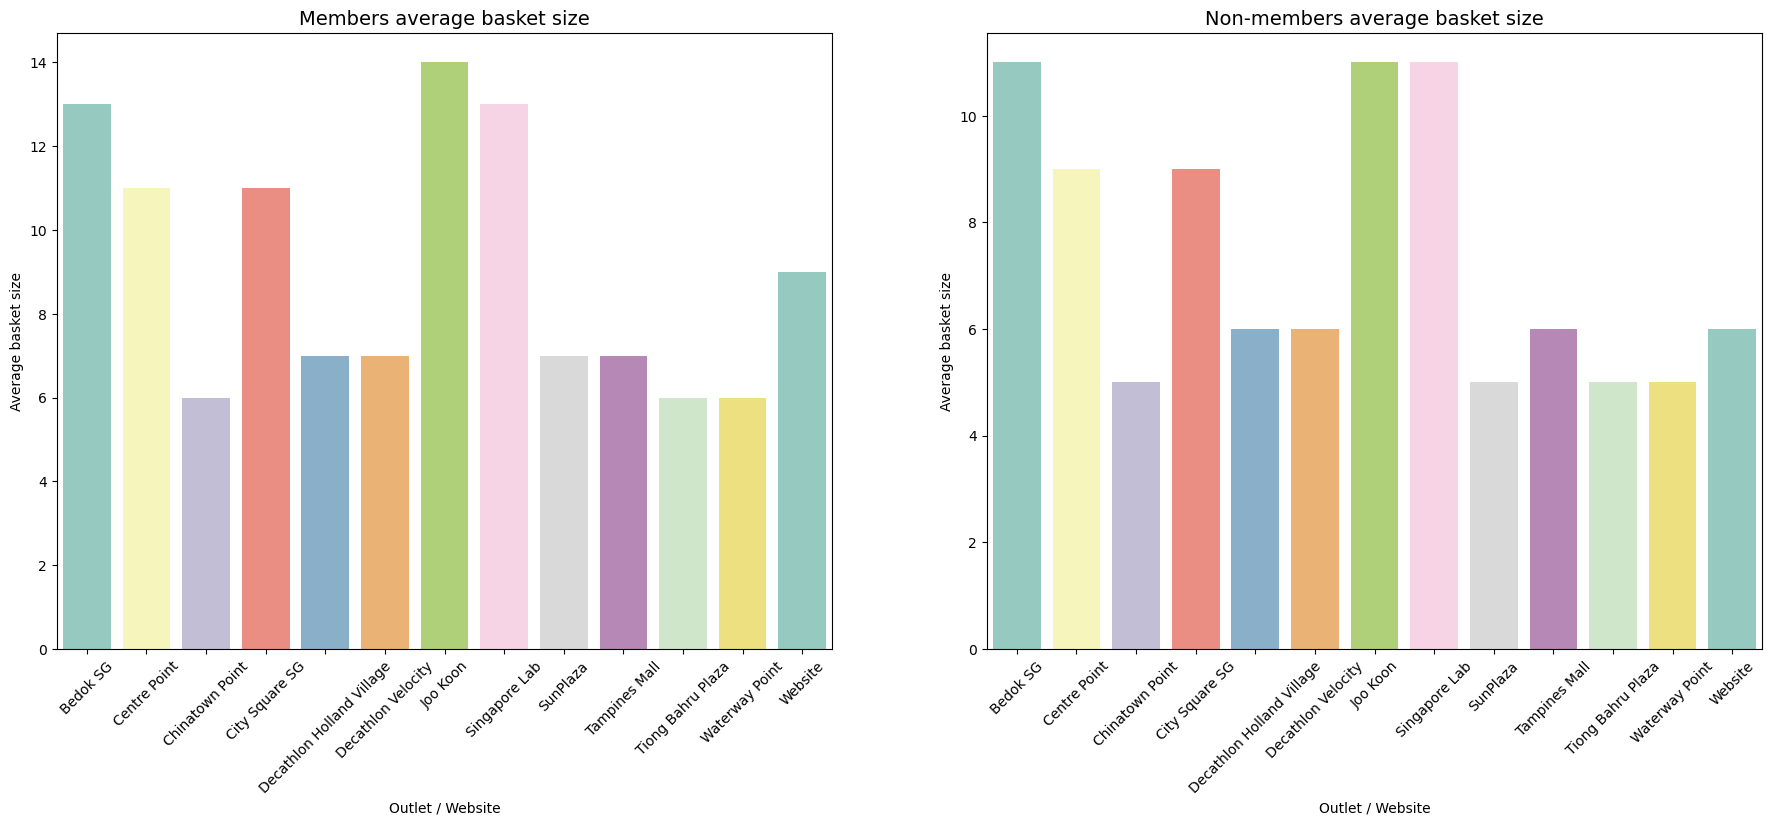

In [21]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# MEMBER Average basket size
sns.barplot(data=groupedmem, x='but_name_business_unit', y='f_qty_item', palette = 'Set3', ax=ax[0])
ax[0].set_title('Members average basket size', fontsize='14')
ax[0].set_xlabel('Outlet / Website')
ax[0].set_ylabel('Average basket size')
ax[0].tick_params(axis='x', rotation=45)

# NON-MEMBER Average basket size
sns.barplot(data=groupednon, x='but_name_business_unit', y='f_qty_item',palette = 'Set3', ax=ax[1])
ax[1].set_title('Non-members average basket size', fontsize='14')
ax[1].set_xlabel('Outlet / Website')
ax[1].set_ylabel('Average basket size')
ax[1].tick_params(axis='x', rotation=45)

plt.show()

#### Member vs non-member basket value

<AxesSubplot:xlabel='but_name_business_unit', ylabel='f_to_tax_in'>

Text(0.5, 1.0, 'Members average basket value')

Text(0.5, 0, 'Outlet / Website')

Text(0, 0.5, 'Average basket value')

<AxesSubplot:xlabel='but_name_business_unit', ylabel='f_to_tax_in'>

Text(0.5, 1.0, 'Non-members average basket value')

Text(0.5, 0, 'Outlet / Website')

Text(0, 0.5, 'Average basket value')

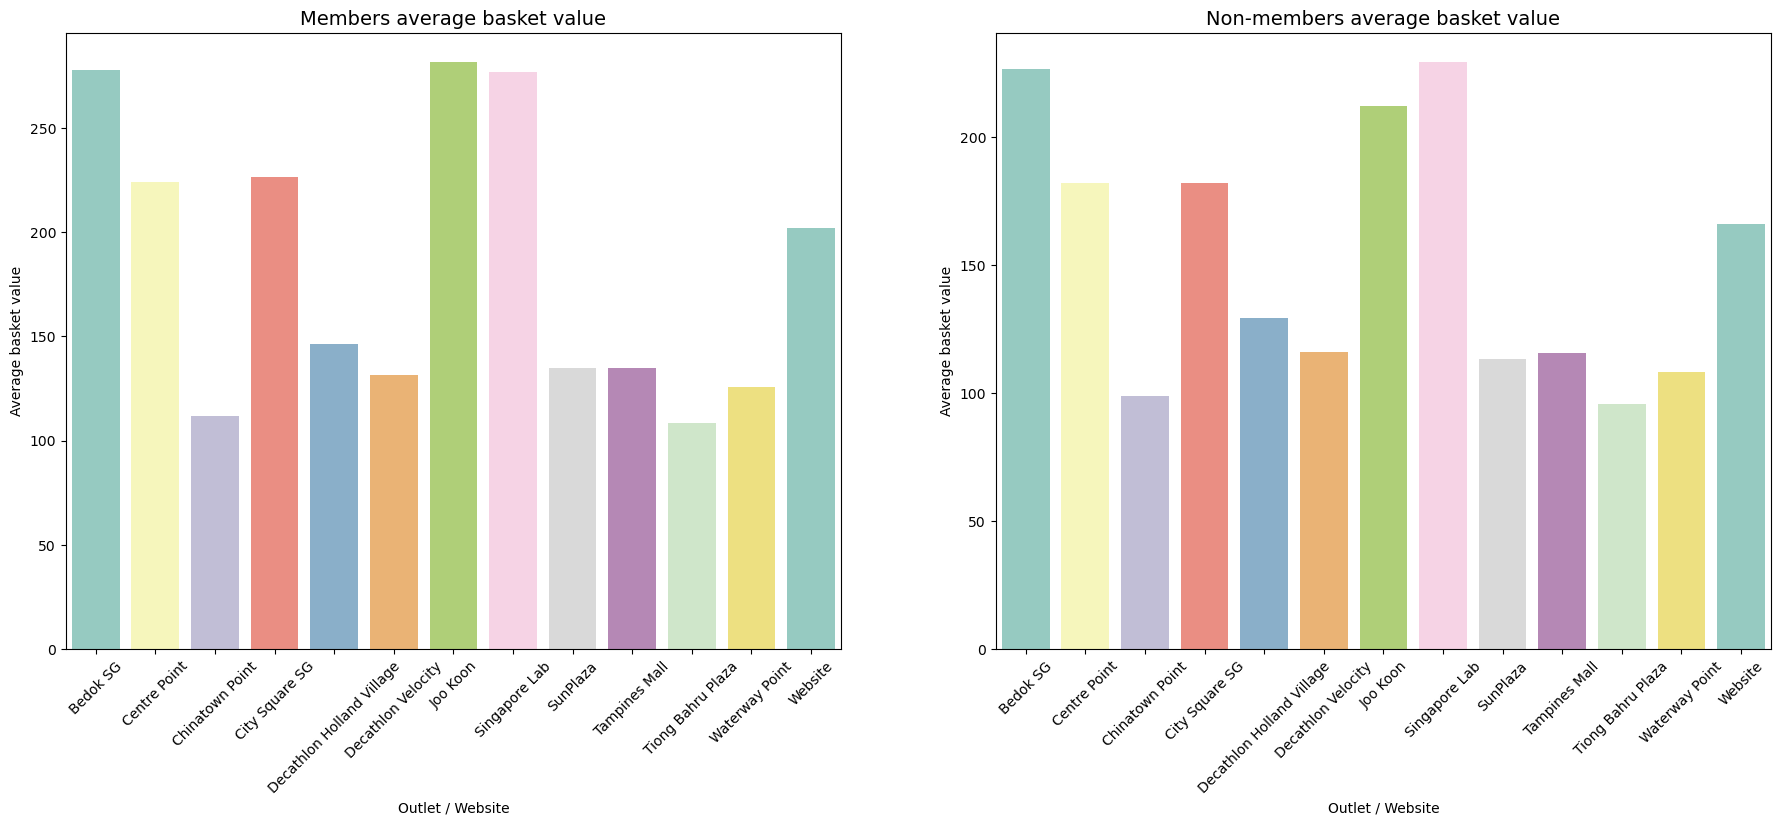

In [22]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# MEMBER Average basket value
sns.barplot(data=groupedmem, x='but_name_business_unit', y='f_to_tax_in', palette = 'Set3', ax=ax[0])
ax[0].set_title('Members average basket value', fontsize='14')
ax[0].set_xlabel('Outlet / Website')
ax[0].set_ylabel('Average basket value')
ax[0].tick_params(axis='x', rotation=45)

# NON-MEMBER Average basket value
sns.barplot(data=groupednon, x='but_name_business_unit', y='f_to_tax_in',palette = 'Set3', ax=ax[1])
ax[1].set_title('Non-members average basket value', fontsize='14')
ax[1].set_xlabel('Outlet / Website')
ax[1].set_ylabel('Average basket value')
ax[1].tick_params(axis='x', rotation=45)

plt.show()

<AxesSubplot:xlabel='f_qty_item', ylabel='f_to_tax_in'>

Text(0.5, 0, 'Average Basket Size')

Text(0, 0.5, 'Average Basket Value')

Text(0.5, 1.0, 'Avg Basket Size vs. Avg Basket Value by Store (Members)')

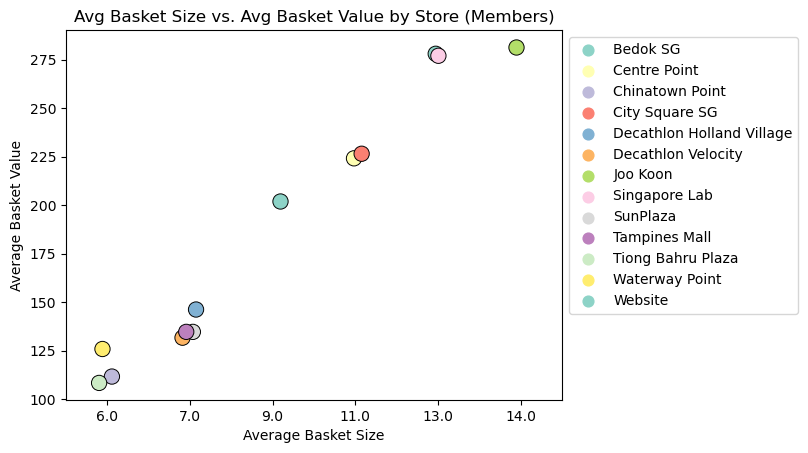

In [23]:
# MEMBER stripplot
sns.stripplot(data=groupedmem, x='f_qty_item', y='f_to_tax_in', hue='but_name_business_unit', s=11, jitter=True, palette = 'Set3',linewidth=0.7, edgecolor='black')

plt.xlabel('Average Basket Size')
plt.ylabel('Average Basket Value')
plt.title('Avg Basket Size vs. Avg Basket Value by Store (Members)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

<AxesSubplot:xlabel='f_qty_item', ylabel='f_to_tax_in'>

Text(0.5, 0, 'Average Basket Size')

Text(0, 0.5, 'Average Basket Value')

Text(0.5, 1.0, 'Avg Basket Size vs. Avg Basket Value by Store (Non-members)')

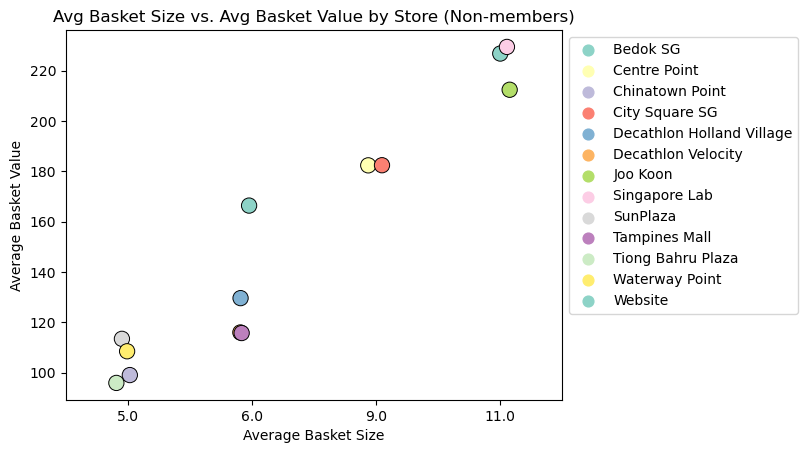

In [24]:
# NON-MEMBER stripplot
sns.stripplot(data=groupednon, x='f_qty_item', y='f_to_tax_in', hue='but_name_business_unit', s=11, jitter=True, palette = 'Set3',linewidth=0.7, edgecolor='black')

plt.xlabel('Average Basket Size')
plt.ylabel('Average Basket Value')
plt.title('Avg Basket Size vs. Avg Basket Value by Store (Non-members)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### In general, members tend to have higher average basket size and value than non-members. 
#### Based on the stripplots, members' avg basket size and value are more linear than non-members, where certain stores such as Bedok, Sunplaza, Velocity, and Tampines Mall might be outliers.

## B. Customers' shopping preferences by channels

In [25]:
# Filtering rows that are by members only.
transacmemsonly = transactions2_nodups[transactions2_nodups['ismember'] == 1]
transacmemsonly

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,ismember
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1
475,7-2459-2459-20200923214628-102-851,2020-09-23 21:46:28,1718267,NaN,NaN,Website,E1OWOWPT1K,online,5,110.5,1
660,7-1034-1034-20200704125639-206-1247,2020-07-04 12:56:39,7197010,SHOES,RUNNING,City Square SG,TALU7QD0XB,offline,3,81.5,1
665,7-1034-1034-20200704104320-213-1225,2020-07-04 10:43:20,1326429,SUNGLASSES,RUNNING,City Square SG,X2VP9YCP4P,offline,5,35.5,1
666,7-1034-1034-20200708154512-215-9107,2020-07-08 15:45:12,7199859,SKORT,RUNNING,City Square SG,R19EP8XVAF,offline,4,86.5,1
...,...,...,...,...,...,...,...,...,...,...,...
5496745,7-969-969-20201226182032-207-5254,2020-12-26 18:20:32,7143415,SHOES,RUNNING,Bedok SG,SOXD1WOTE2,offline,4,78.0,1
5496746,7-969-969-20201226201312-211-8466,2020-12-26 20:13:12,2177227,SOCKS,RUNNING,Bedok SG,NA91D6G8HO,offline,4,8.0,1
5496748,7-969-969-20201230184807-207-5820,2020-12-30 18:48:07,1202775,SOCKS,RUNNING,Bedok SG,F6G0ST0TX9,offline,1,123.0,1
5496749,7-969-969-20201230184807-207-5820,2020-12-30 18:48:07,2386363,SOCKS,RUNNING,Bedok SG,F6G0ST0TX9,offline,1,40.5,1


In [26]:
# Will only need customer ID and store name.
transacmemsonly2 = transacmemsonly.filter(['ctm_customer_id','but_name_business_unit'], axis=1)
transacmemsonly2

,ctm_customer_id,but_name_business_unit
91,8VSGYLTXL2,City Square SG
475,E1OWOWPT1K,Website
660,TALU7QD0XB,City Square SG
665,X2VP9YCP4P,City Square SG
666,R19EP8XVAF,City Square SG
...,...,...
5496745,SOXD1WOTE2,Bedok SG
5496746,NA91D6G8HO,Bedok SG
5496748,F6G0ST0TX9,Bedok SG
5496749,F6G0ST0TX9,Bedok SG


In [27]:
# Checking if there are any rows where store name is wrong / unexpected entries. No issues.
transacmemsonly2.nunique()

ctm_customer_id           384893
but_name_business_unit        13
dtype: int64

In [28]:
# Replace individual store names by their main channel category.
transacmemsonly2['but_name_business_unit'] = transacmemsonly2['but_name_business_unit'].replace({'City Square SG': 'Ex', 'Joo Koon': 'Ex', 'Singapore Lab': 'Ex', 'Centre Point': 'Ex', 'Bedok SG': 'CC', 'Chinatown Point': 'CC', 'Decathlon Holland Village': 'CC', 'Decathlon Velocity': 'CC', 'SunPlaza': 'CC', 'Tampines Mall': 'CC', 'Tiong Bahru Plaza': 'CC', 'Waterway Point': 'CC'})
transacmemsonly2

,ctm_customer_id,but_name_business_unit
91,8VSGYLTXL2,Ex
475,E1OWOWPT1K,Website
660,TALU7QD0XB,Ex
665,X2VP9YCP4P,Ex
666,R19EP8XVAF,Ex
...,...,...
5496745,SOXD1WOTE2,CC
5496746,NA91D6G8HO,CC
5496748,F6G0ST0TX9,CC
5496749,F6G0ST0TX9,CC


In [29]:
# One-hot encoding main channels
one_hot = pd.get_dummies(transacmemsonly2['but_name_business_unit'])
transacmemsonly2 = pd.concat([transacmemsonly2, one_hot], axis=1)
transacmemsonly2


,ctm_customer_id,but_name_business_unit,CC,Ex,Website
91,8VSGYLTXL2,Ex,0,1,0
475,E1OWOWPT1K,Website,0,0,1
660,TALU7QD0XB,Ex,0,1,0
665,X2VP9YCP4P,Ex,0,1,0
666,R19EP8XVAF,Ex,0,1,0
...,...,...,...,...,...
5496745,SOXD1WOTE2,CC,1,0,0
5496746,NA91D6G8HO,CC,1,0,0
5496748,F6G0ST0TX9,CC,1,0,0
5496749,F6G0ST0TX9,CC,1,0,0


In [30]:
# Grouping by unique customer IDs, and summing the one-hot values.
# If 0, member never shopped that channel, and non-0 means they did.
memsgroup = transacmemsonly2.groupby('ctm_customer_id').sum().reset_index()
memsgroup

,ctm_customer_id,CC,Ex,Website
0,000DFTLRKY,0.0,7.0,0.0
1,000FX6RHTM,0.0,7.0,0.0
2,000NZ1KH93,1.0,6.0,0.0
3,000R842PBV,0.0,0.0,5.0
4,0014SWGO7X,0.0,3.0,0.0
...,...,...,...,...
384888,ZZZMIYQG58,11.0,0.0,0.0
384889,ZZZPD2IMD6,0.0,0.0,6.0
384890,ZZZS1QUNOD,0.0,18.0,0.0
384891,ZZZUB8CDE9,2.0,2.0,1.0


In [31]:
# Creating a new column based on the above results.

memsgroup.loc[(memsgroup['CC'] != 0) & (memsgroup['Ex'] == 0) & (memsgroup['Website'] == 0), 'channels'] = 'C&C only'
memsgroup.loc[(memsgroup['CC'] == 0) & (memsgroup['Ex'] != 0) & (memsgroup['Website'] == 0), 'channels'] = 'Experience only'
memsgroup.loc[(memsgroup['CC'] == 0) & (memsgroup['Ex'] == 0) & (memsgroup['Website'] != 0), 'channels'] = 'Online only'

memsgroup.loc[(memsgroup['CC'] != 0) & (memsgroup['Ex'] != 0) & (memsgroup['Website'] == 0), 'channels'] = 'C&C and Experience'
memsgroup.loc[(memsgroup['CC'] != 0) & (memsgroup['Ex'] == 0) & (memsgroup['Website'] != 0), 'channels'] = 'C&C and Online'
memsgroup.loc[(memsgroup['CC'] == 0) & (memsgroup['Ex'] != 0) & (memsgroup['Website'] != 0), 'channels'] = 'Experience and Online'

memsgroup.loc[(memsgroup['CC'] != 0) & (memsgroup['Ex'] != 0) & (memsgroup['Website'] != 0), 'channels'] = 'All channels'

memsgroup

,ctm_customer_id,CC,Ex,Website,channels
0,000DFTLRKY,0.0,7.0,0.0,Experience only
1,000FX6RHTM,0.0,7.0,0.0,Experience only
2,000NZ1KH93,1.0,6.0,0.0,C&C and Experience
3,000R842PBV,0.0,0.0,5.0,Online only
4,0014SWGO7X,0.0,3.0,0.0,Experience only
...,...,...,...,...,...
384888,ZZZMIYQG58,11.0,0.0,0.0,C&C only
384889,ZZZPD2IMD6,0.0,0.0,6.0,Online only
384890,ZZZS1QUNOD,0.0,18.0,0.0,Experience only
384891,ZZZUB8CDE9,2.0,2.0,1.0,All channels


### Breakdown of customer channel preferences

In [32]:
# Count the occurrences of each unique value in 'channels'.
value_counts = memsgroup['channels'].value_counts()

# Calculate the total number of records.
total_records = len(memsgroup)

# Calculate the percentage for each combination.
proportion = value_counts / total_records
percentage = proportion * 100
percentagedf = percentage.reset_index()
percentagedf.columns = ['channels', 'percentage']
percentagedf['percentage'] = percentagedf['percentage'].round(2)
percentagedf

,channels,percentage
0,Experience only,39.90
1,C&C only,18.74
2,Online only,17.25
3,C&C and Experience,10.04
4,Experience and Online,6.73
5,C&C and Online,3.90
6,All channels,3.44


<AxesSubplot:xlabel='channels', ylabel='percentage'>

Text(0.5, 0, 'Channels')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Breakdown of member channel preferences (%)')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Experience only'),
  Text(1, 0, 'C&C only'),
  Text(2, 0, 'Online only'),
  Text(3, 0, 'C&C and Experience'),
  Text(4, 0, 'Experience and Online'),
  Text(5, 0, 'C&C and Online'),
  Text(6, 0, 'All channels')])

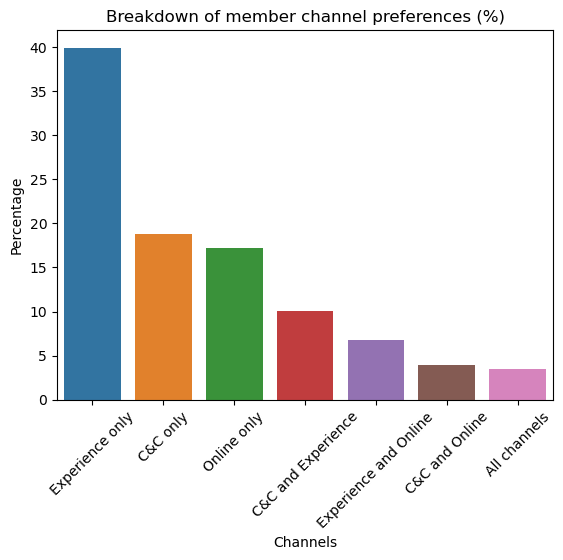

In [33]:
# Bar plot of the above findings.
sns.barplot(data=percentagedf, x="channels", y="percentage")

plt.xlabel('Channels')
plt.ylabel('Percentage')
plt.title('Breakdown of member channel preferences (%)')
plt.xticks(rotation=45)

## C. Timings in the day that are most popular for customers

### Preparing data

In [34]:
# Filtering only rows from trasactions made in stores.
timeanalysisdf = transactions2_nodups[transactions2_nodups['but_name_business_unit'] != 'Website']
timeanalysisdf

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,ismember
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5496746,7-969-969-20201226201312-211-8466,2020-12-26 20:13:12,2177227,SOCKS,RUNNING,Bedok SG,NA91D6G8HO,offline,4,8.0,1
5496747,7-969-969-20201230153254-211-8943,2020-12-30 15:32:54,6867239,SHOES,RUNNING,Bedok SG,NaN,offline,1,40.0,0
5496748,7-969-969-20201230184807-207-5820,2020-12-30 18:48:07,1202775,SOCKS,RUNNING,Bedok SG,F6G0ST0TX9,offline,1,123.0,1
5496749,7-969-969-20201230184807-207-5820,2020-12-30 18:48:07,2386363,SOCKS,RUNNING,Bedok SG,F6G0ST0TX9,offline,1,40.5,1


In [35]:
# Since each transaction = each visit, and nothing else is being analysed, filter only one row of each unique transaction ID.
timeanalysisdf_unique = timeanalysisdf.drop_duplicates(subset=['the_transaction_id'])
timeanalysisdf_unique 

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,ismember
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5496739,7-969-969-20201221183040-212-3813,2020-12-21 18:30:40,7272577,SHOES,RUNNING,Bedok SG,QY1SK522QB,offline,5,58.0,1
5496741,7-969-969-20201224141216-209-4124,2020-12-24 14:12:16,7145826,SHOES,RUNNING,Bedok SG,NaN,offline,2,76.0,0
5496743,7-969-969-20201225203144-212-4226,2020-12-25 20:31:44,6978926,SHOES,RUNNING,Bedok SG,51MVXLVL5I,offline,2,30.5,1
5496747,7-969-969-20201230153254-211-8943,2020-12-30 15:32:54,6867239,SHOES,RUNNING,Bedok SG,NaN,offline,1,40.0,0


In [36]:
# New column with day of the week
timeanalysisdf_unique['dayOfWeek'] = timeanalysisdf_unique['the_date_transaction'].dt.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
timeanalysisdf_unique

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,ismember,dayOfWeek
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0,Saturday
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1,Tuesday
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0,Saturday
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0,Thursday
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0,0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
5496739,7-969-969-20201221183040-212-3813,2020-12-21 18:30:40,7272577,SHOES,RUNNING,Bedok SG,QY1SK522QB,offline,5,58.0,1,Monday
5496741,7-969-969-20201224141216-209-4124,2020-12-24 14:12:16,7145826,SHOES,RUNNING,Bedok SG,NaN,offline,2,76.0,0,Thursday
5496743,7-969-969-20201225203144-212-4226,2020-12-25 20:31:44,6978926,SHOES,RUNNING,Bedok SG,51MVXLVL5I,offline,2,30.5,1,Friday
5496747,7-969-969-20201230153254-211-8943,2020-12-30 15:32:54,6867239,SHOES,RUNNING,Bedok SG,NaN,offline,1,40.0,0,Wednesday


In [37]:
# Labelling if the day of visit was a weekday or weekend.
timeanalysisdf_unique['dayType'] = timeanalysisdf_unique['dayOfWeek'].apply(lambda day: 'Weekend' if day in ['Saturday', 'Sunday'] else 'Weekday')
timeanalysisdf_unique

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,ismember,dayOfWeek,dayType
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0,Saturday,Weekend
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1,Tuesday,Weekday
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0,Saturday,Weekend
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0,Thursday,Weekday
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0,0,Wednesday,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5496739,7-969-969-20201221183040-212-3813,2020-12-21 18:30:40,7272577,SHOES,RUNNING,Bedok SG,QY1SK522QB,offline,5,58.0,1,Monday,Weekday
5496741,7-969-969-20201224141216-209-4124,2020-12-24 14:12:16,7145826,SHOES,RUNNING,Bedok SG,NaN,offline,2,76.0,0,Thursday,Weekday
5496743,7-969-969-20201225203144-212-4226,2020-12-25 20:31:44,6978926,SHOES,RUNNING,Bedok SG,51MVXLVL5I,offline,2,30.5,1,Friday,Weekday
5496747,7-969-969-20201230153254-211-8943,2020-12-30 15:32:54,6867239,SHOES,RUNNING,Bedok SG,NaN,offline,1,40.0,0,Wednesday,Weekday


In [38]:
# New column with transaction time rounded to nearest hour.
timeanalysisdf_unique['rounded_hour'] = timeanalysisdf_unique['the_date_transaction'].dt.round("H")

# Extract only the rounded time of the day.
timeanalysisdf_unique['rounded_hour'] = timeanalysisdf_unique['rounded_hour'].dt.strftime('%H:%M:%S')

timeanalysisdf_unique

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,ismember,dayOfWeek,dayType,rounded_hour
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0,Saturday,Weekend,14:00:00
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1,Tuesday,Weekday,11:00:00
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0,Saturday,Weekend,23:00:00
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0,Thursday,Weekday,14:00:00
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0,0,Wednesday,Weekday,19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5496739,7-969-969-20201221183040-212-3813,2020-12-21 18:30:40,7272577,SHOES,RUNNING,Bedok SG,QY1SK522QB,offline,5,58.0,1,Monday,Weekday,19:00:00
5496741,7-969-969-20201224141216-209-4124,2020-12-24 14:12:16,7145826,SHOES,RUNNING,Bedok SG,NaN,offline,2,76.0,0,Thursday,Weekday,14:00:00
5496743,7-969-969-20201225203144-212-4226,2020-12-25 20:31:44,6978926,SHOES,RUNNING,Bedok SG,51MVXLVL5I,offline,2,30.5,1,Friday,Weekday,21:00:00
5496747,7-969-969-20201230153254-211-8943,2020-12-30 15:32:54,6867239,SHOES,RUNNING,Bedok SG,NaN,offline,1,40.0,0,Wednesday,Weekday,16:00:00


In [39]:
# Assigning order to the timings for visualisations. Order was chosen based on Decathlon outlets opening hours (earliest being 9:30am).
timeanalysisdf_unique['rounded_hour'] = pd.Categorical(timeanalysisdf_unique['rounded_hour'], ['09:00:00','10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00','15:00:00','16:00:00','17:00:00','18:00:00','19:00:00','20:00:00','21:00:00','22:00:00','23:00:00','00:00:00','02:00:00','03:00:00','04:00:00','05:00:00','08:00:00'])
timeanalysisdf_unique

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,ismember,dayOfWeek,dayType,rounded_hour
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0,Saturday,Weekend,14:00:00
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1,Tuesday,Weekday,11:00:00
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0,Saturday,Weekend,23:00:00
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0,Thursday,Weekday,14:00:00
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0,0,Wednesday,Weekday,19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5496739,7-969-969-20201221183040-212-3813,2020-12-21 18:30:40,7272577,SHOES,RUNNING,Bedok SG,QY1SK522QB,offline,5,58.0,1,Monday,Weekday,19:00:00
5496741,7-969-969-20201224141216-209-4124,2020-12-24 14:12:16,7145826,SHOES,RUNNING,Bedok SG,NaN,offline,2,76.0,0,Thursday,Weekday,14:00:00
5496743,7-969-969-20201225203144-212-4226,2020-12-25 20:31:44,6978926,SHOES,RUNNING,Bedok SG,51MVXLVL5I,offline,2,30.5,1,Friday,Weekday,21:00:00
5496747,7-969-969-20201230153254-211-8943,2020-12-30 15:32:54,6867239,SHOES,RUNNING,Bedok SG,NaN,offline,1,40.0,0,Wednesday,Weekday,16:00:00


In [40]:
# Separating weekday and weekend data.
timeana_weekday = timeanalysisdf_unique[timeanalysisdf_unique['dayType'] == 'Weekday']
timeana_weekend = timeanalysisdf_unique[timeanalysisdf_unique['dayType'] == 'Weekend']

### Plotting time distributions and analysing most popular timings for stores

<Figure size 1100x800 with 0 Axes>

<AxesSubplot:xlabel='rounded_hour', ylabel='Count'>

Text(0.5, 0, 'Hour of day')

Text(0, 0.5, 'Transactions')

Text(0.5, 1.0, 'Distribution of all store transactions by hour of day')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

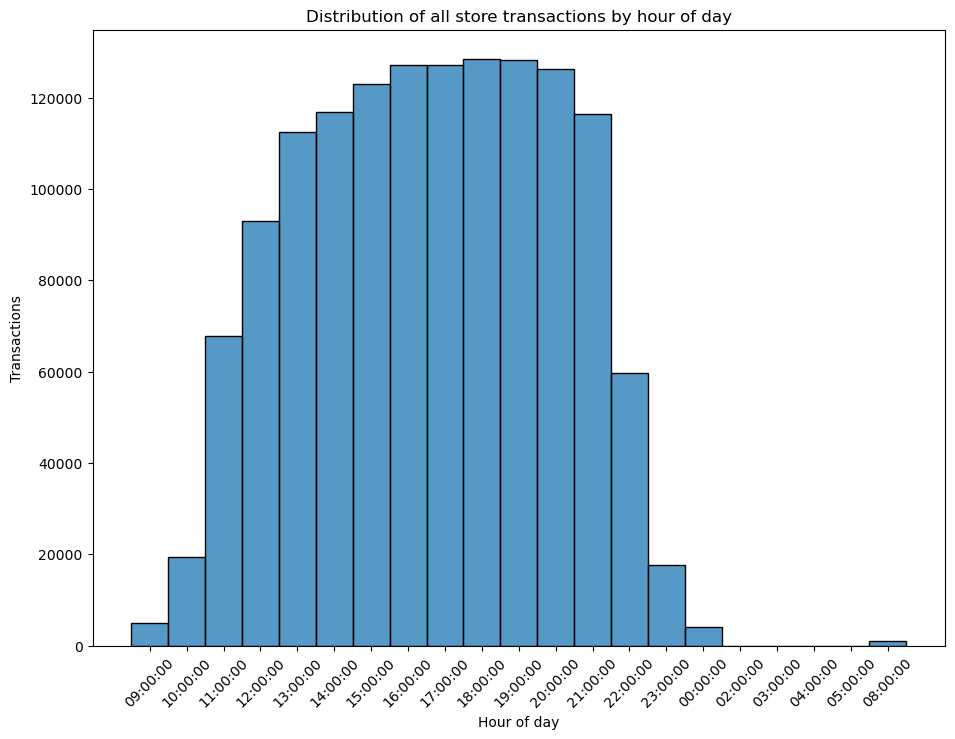

In [41]:
# Plotting histogram of the full dataset.
plt.figure(figsize=(11, 8))
sns.histplot(data=timeanalysisdf_unique, x='rounded_hour')

plt.xlabel('Hour of day')
plt.ylabel('Transactions')
plt.title('Distribution of all store transactions by hour of day')
plt.xticks(rotation=45)

plt.show()

#### Preliminarily, based on the histogram of all data, 4pm - 8pm is a popular time for customers to shop.
#### However, the data can be broken down further for more specific insight.
#### For example, weekday vs weekend, and distributions for each outlet, where location could have a factor, e.g. C&C stores in heartlands can be passed by / dropped by quickly, whereas experience stores on outskirts require a planned trip.

<AxesSubplot:xlabel='rounded_hour', ylabel='Count'>

Text(0.5, 1.0, 'Weekday distribution')

Text(0.5, 0, 'Hour of day')

Text(0, 0.5, 'Transactions')

<AxesSubplot:xlabel='rounded_hour', ylabel='Count'>

Text(0.5, 1.0, 'Weekend distribution')

Text(0.5, 0, 'Hour of day')

Text(0, 0.5, 'Transactions')

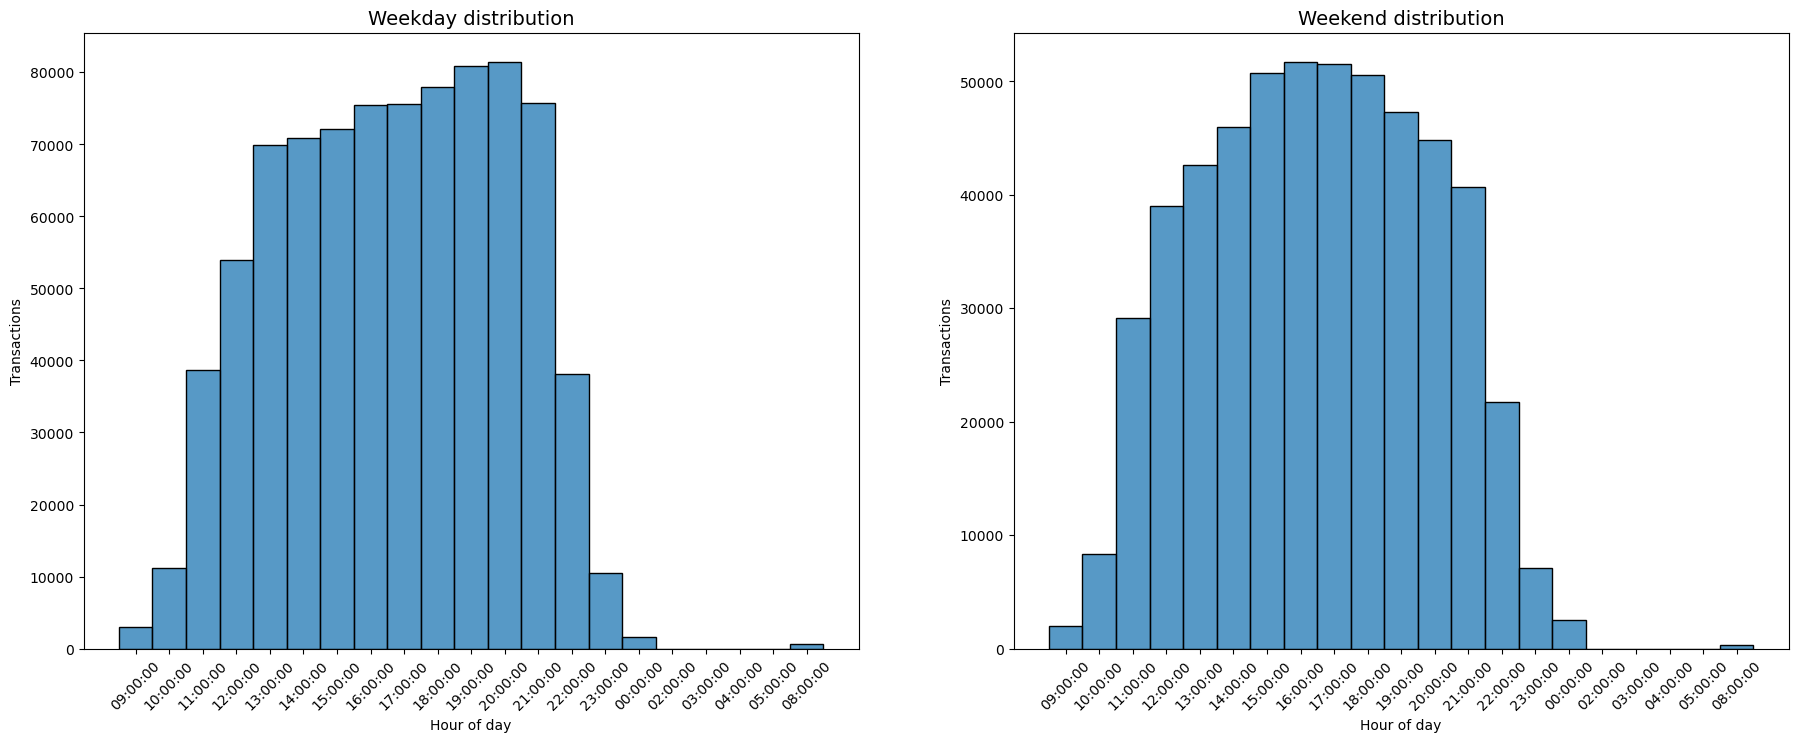

In [42]:
# Weekday and weekend distributions
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Weekday
sns.histplot(data=timeana_weekday, x='rounded_hour', ax=ax[0])
ax[0].set_title('Weekday distribution', fontsize='14')
ax[0].set_xlabel('Hour of day')
ax[0].set_ylabel('Transactions')
ax[0].tick_params(axis='x', rotation=45)

# Weekend
sns.histplot(data=timeana_weekend, x='rounded_hour',ax=ax[1])
ax[1].set_title('Weekend distribution', fontsize='14')
ax[1].set_xlabel('Hour of day')
ax[1].set_ylabel('Transactions')
ax[1].tick_params(axis='x', rotation=45)

plt.show()

#### Splitting weekday and weekend distributions, we see that for weekdays, timings that are later in the day, 6pm - 8pm are most popular, whilst on weekends, earlier in the day, 3pm - 6pm is most popular. This is likely due to people having to work on weekdays and can only visit after work, and 3pm - 6pm being between meals on weekends.

<Figure size 1100x800 with 0 Axes>

C:\Users\diony\AppData\Local\Temp\ipykernel_16136\3487437870.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


<Figure size 1100x800 with 0 Axes>

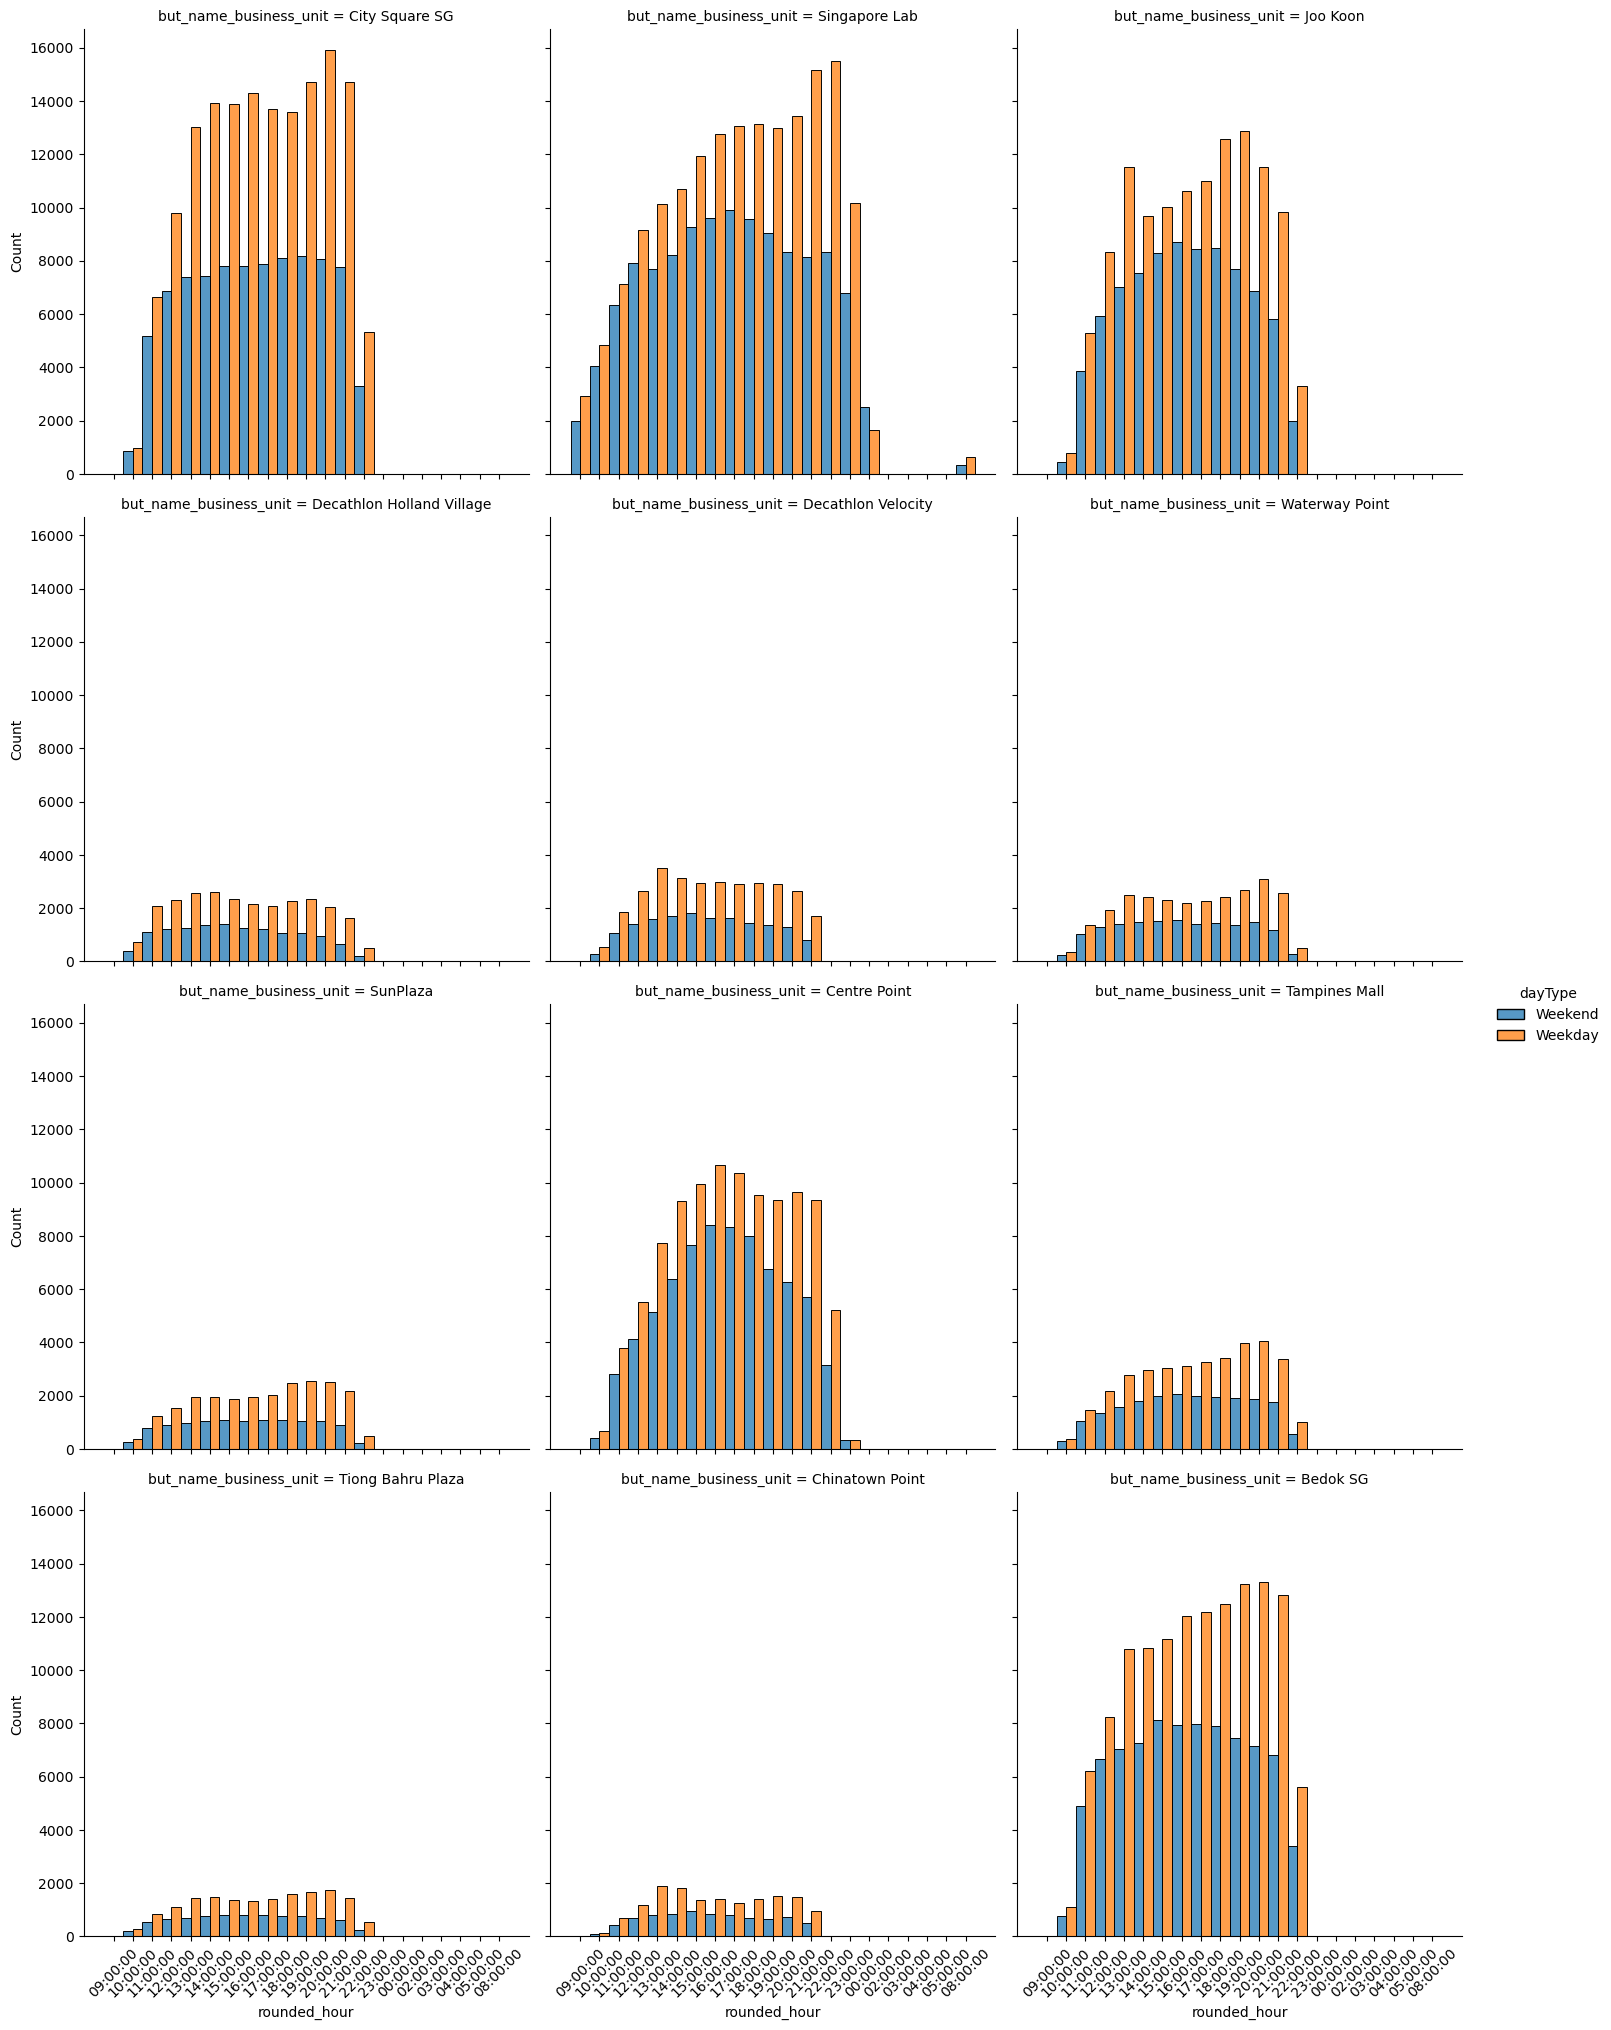

In [43]:
# Plotting weekday and weekend distribution for each outlet.
plt.figure(figsize=(11, 8))
timedisps = sns.displot(data=timeanalysisdf_unique, x="rounded_hour", hue="dayType", multiple='dodge', col="but_name_business_unit",col_wrap=3) 
for axes in timedisps.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

#### Further breaking down to by outlet, we see the weekday/weekend trends largely apply across outlets, weekends tend to peak at midday, while weekdays either spike at night, or in afternoon and nights. We get a general sense of which outlets see more traffic than others, and we can also observe that certain outlets have interesting anomalies, like Joo Koon, Chinatown Point, and Velocity peak / have large spikes during lunch hour on weekdays, which could be because they are surrounded by offices.